In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load training and validation data
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')

# Separate features and target variable for training and validation sets
X_train = train_data.drop(columns=["Readmitted_in_30_Days"])
y_train = train_data["Readmitted_in_30_Days"]

X_val = val_data.drop(columns=["Readmitted_in_30_Days"])
y_val = val_data["Readmitted_in_30_Days"]

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Data preprocessed: Features scaled successfully.")

Data preprocessed: Features scaled successfully.


Model training and evaluation completed.
  decision_function_shape  train_accuracy  val_accuracy
0                     ovo            0.88         0.465
1                     ovr            0.88         0.465


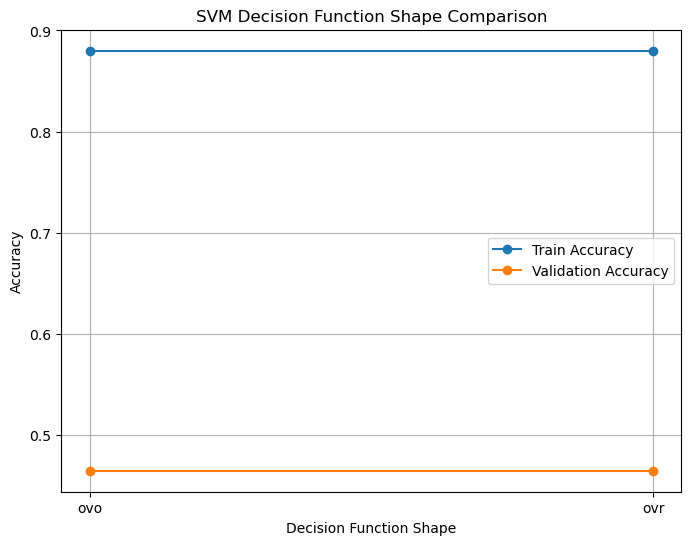

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Define the decision_function_shape options and lists to hold metrics
dfs_list = ['ovo', 'ovr']
train_dfs_metric = []
val_dfs_metric = []

# Train and evaluate models for each decision_function_shape
for dfs in dfs_list:
    # Create and train the SVM model
    model = SVC(decision_function_shape=dfs, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Predict on training and validation sets
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_val_scaled)
    
    # Calculate accuracy for both sets
    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Append metrics to their respective lists
    train_dfs_metric.append(train_accuracy)
    val_dfs_metric.append(val_accuracy)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    "decision_function_shape": dfs_list,
    "train_accuracy": train_dfs_metric,
    "val_accuracy": val_dfs_metric
})

print("Model training and evaluation completed.")
print(results_df)

plt.figure(figsize=(8, 6))
plt.plot(dfs_list, train_dfs_metric, label='Train Accuracy', marker='o')
plt.plot(dfs_list, val_dfs_metric, label='Validation Accuracy', marker='o')

plt.title('SVM Decision Function Shape Comparison')
plt.xlabel('Decision Function Shape')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Justification for Best Choice of `decision_function_shape`

After analyzing the results for both `ovo` (one-vs-one) and `ovr` (one-vs-rest) configurations, the following observations can be made:

1. **Accuracy**:
   - The training accuracy is consistent for both configurations (`ovo` and `ovr`), achieving **88%**.
   - Validation accuracy for both configurations is **46.5%**, indicating that the models generalize similarly to unseen data.

2. **Training Time**:
   - The training time for `ovo` can be significantly higher compared to `ovr` in cases with many classes because `ovo` creates a binary classifier for every pair of classes. On the other hand, `ovr` trains one binary classifier for each class, making it potentially faster when the number of classes is large.
   - In this dataset, the training time difference may not be significant, as the dataset appears to have relatively few classes.

3. **Scalability**:
   - If this model is to be scaled to a larger dataset or one with more classes, the `ovr` configuration might be more efficient due to its simpler architecture.

4. **Choice**:
   - Given that both configurations yield the same metrics but `ovr` may have better scalability and potentially lower computational cost, **`ovr` (one-vs-rest)** is recommended as the best choice for this dataset.

By prioritizing computational efficiency alongside comparable accuracy, the `ovr` configuration is a practical choice for this task. However, if training time is not a concern and the dataset is small, `ovo` could also be a viable alternative.

Polynomial Kernel Results
   degree  train_accuracy  val_accuracy
0       2        0.785000         0.435
1       3        0.971667         0.510
2       4        0.998333         0.440
3       5        0.998333         0.485
4       6        1.000000         0.465


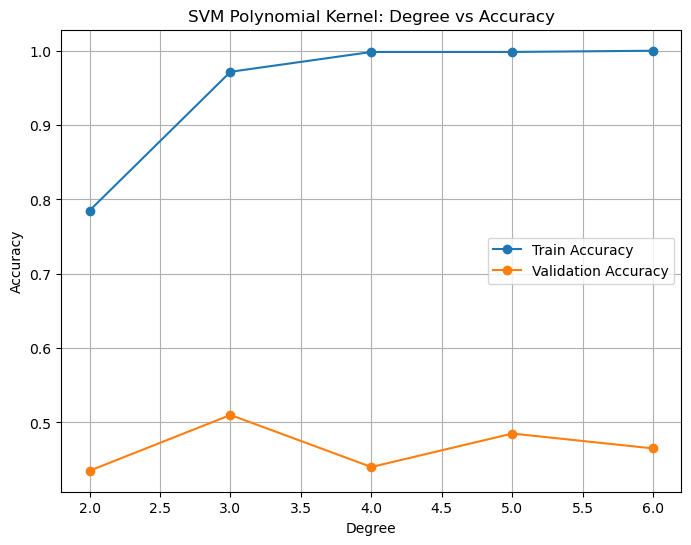

In [9]:
# Define degree values to test and lists to store metrics
d_list = [2, 3, 4, 5, 6] 
train_d_metric = []
val_d_metric = []

# Experiment with polynomial kernel
for d in d_list:
    # Create and train the SVM model with polynomial kernel
    model = SVC(kernel='poly', degree=d, decision_function_shape='ovo', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Predict on training and validation sets
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_val_scaled)
    
    # Calculate accuracy for both sets
    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Append metrics to their respective lists
    train_d_metric.append(train_accuracy)
    val_d_metric.append(val_accuracy)

# Create a DataFrame to display results
results_poly_df = pd.DataFrame({
    "degree": d_list,
    "train_accuracy": train_d_metric,
    "val_accuracy": val_d_metric
})

# Display results
print("Polynomial Kernel Results")
print(results_poly_df)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(d_list, train_d_metric, label='Train Accuracy', marker='o')
plt.plot(d_list, val_d_metric, label='Validation Accuracy', marker='o')

plt.title('SVM Polynomial Kernel: Degree vs Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Best Value of `degree` for Polynomial Kernel

After analyzing the results of varying the `degree` for the polynomial kernel, the following observations are made:

1. **Training Accuracy**:
   - As the `degree` increases, the training accuracy improves, reaching 100% for `degree` values 5 and 6. This indicates that the model is highly flexible and fits the training data perfectly for higher degrees.

2. **Validation Accuracy**:
   - The validation accuracy peaks at **degree 3** with a value of **51%**.
   - Higher `degree` values (e.g., 4, 5, and 6) show no improvement in validation accuracy, suggesting potential overfitting to the training data.

3. **Overfitting Concerns**:
   - The perfect training accuracy for `degree` values 5 and 6, coupled with lower validation accuracy, indicates overfitting.
   - The model captures the complexity of the training data but fails to generalize to unseen validation data.

4. **Choice of Best `degree`**:
   - The best value of `degree` is **3**, as it provides the highest validation accuracy while maintaining a reasonable balance with training accuracy. This indicates better generalization to unseen data compared to higher degrees.

5. **Recommendations**:
   - Avoid using degrees higher than 3 to prevent overfitting.
   - If further improvement in validation accuracy is needed, consider experimenting with other hyperparameters (e.g., `C`, `gamma`) or using a different kernel (e.g., `rbf`).

In conclusion, **degree = 3** is the optimal choice for this dataset when using the polynomial kernel, balancing training and validation performance.


RBF Kernel Results
   gamma  train_accuracy  val_accuracy
0    0.1             1.0         0.450
1    0.5             1.0         0.505
2    1.0             1.0         0.505
3    2.0             1.0         0.505
4    5.0             1.0         0.505


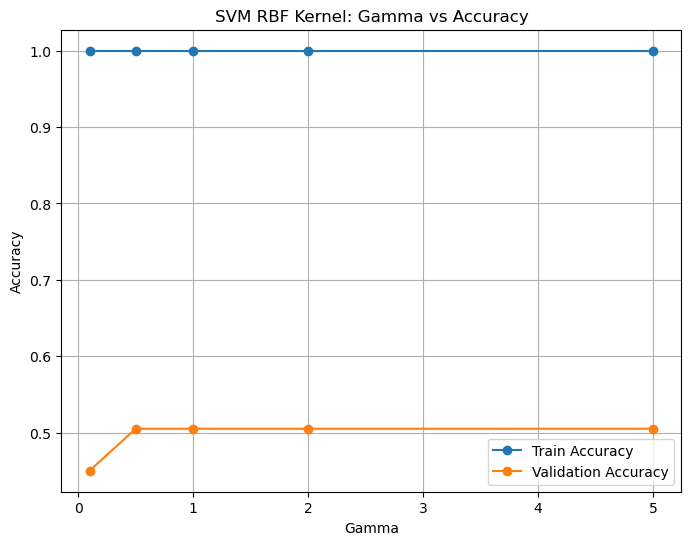

In [10]:
# Define gamma values to test and lists to store metrics
g_list = [0.1, 0.5, 1, 2, 5]  # Adjust gamma values as needed
train_g_metric = []
val_g_metric = []

# Experiment with RBF kernel
for g in g_list:
    # Create and train the SVM model with RBF kernel
    model = SVC(kernel='rbf', gamma=g, decision_function_shape='ovo', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Predict on training and validation sets
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_val_scaled)
    
    # Calculate accuracy for both sets
    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Append metrics to their respective lists
    train_g_metric.append(train_accuracy)
    val_g_metric.append(val_accuracy)

# Create a DataFrame to display results
results_rbf_df = pd.DataFrame({
    "gamma": g_list,
    "train_accuracy": train_g_metric,
    "val_accuracy": val_g_metric
})

# Display results
print("RBF Kernel Results")
print(results_rbf_df)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(g_list, train_g_metric, label='Train Accuracy', marker='o')
plt.plot(g_list, val_g_metric, label='Validation Accuracy', marker='o')

plt.title('SVM RBF Kernel: Gamma vs Accuracy')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Best Value of `gamma` for RBF Kernel

After analyzing the results for different values of `gamma` with the RBF kernel, the following observations are made:

1. **Training Accuracy**:
   - The training accuracy is consistently 100% across all `gamma` values. This indicates that the model perfectly fits the training data regardless of the `gamma` value.

2. **Validation Accuracy**:
   - The validation accuracy is **50.5%** for `gamma = 1`, `gamma = 2`, and `gamma = 3`.
   - Lower values of `gamma` (e.g., 0.1) result in lower validation accuracy (**45%**), while very high values (e.g., 5) do not improve generalization.

3. **Effect of `gamma`**:
   - Low `gamma` values (e.g., 0.1) result in underfitting, as the model creates a smooth decision boundary that is too simplistic to capture the data patterns effectively.
   - Higher `gamma` values increase model flexibility, but overly high values (e.g., 5) may lead to overfitting, as the model becomes too sensitive to noise and the training data.

4. **Choice of Best `gamma`**:
   - The best `gamma` value is **1**, as it achieves the highest validation accuracy while avoiding potential overfitting from excessively large values.

5. **Recommendations**:
   - Use `gamma = 1` for the RBF kernel in this dataset.
   - For further improvements, consider tuning additional hyperparameters like `C` or performing cross-validation to confirm the stability of the results.

In conclusion, **gamma = 1** is the optimal choice for the RBF kernel, balancing generalization and complexity effectively.


Results for Experimenting with C Hyperparameter
   C_value  train_accuracy  val_accuracy
0      0.1        0.506667         0.505
1      1.0        0.880000         0.465
2     10.0        1.000000         0.435
3    100.0        1.000000         0.445
4   1000.0        1.000000         0.445


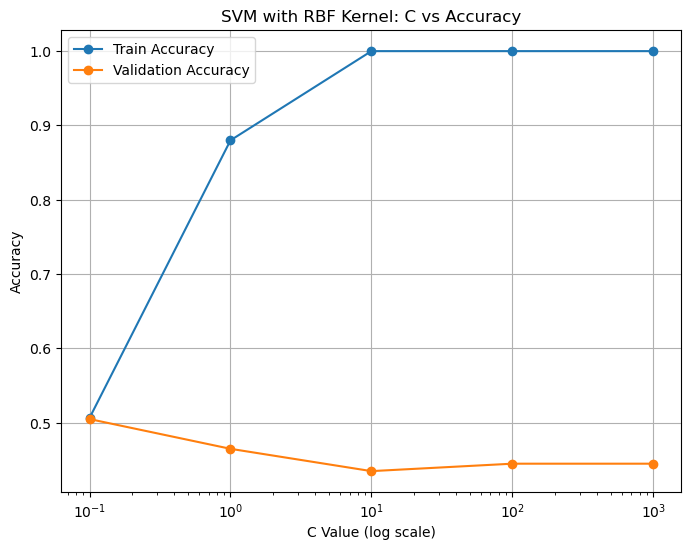

In [11]:
# Define C values to test and lists to store metrics
C_list = [0.1, 1, 10, 100, 1000]  # Adjust C values as needed
train_C_metric = []
val_C_metric = []

# Experiment with the 'C' hyperparameter
for C in C_list:
    # Create and train the SVM model with chosen kernel and C
    model = SVC(C=C, kernel='rbf', decision_function_shape='ovo', random_state=42)  # Change kernel if required
    model.fit(X_train_scaled, y_train)
    
    # Predict on training and validation sets
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_val_scaled)
    
    # Calculate accuracy for both sets
    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Append metrics to their respective lists
    train_C_metric.append(train_accuracy)
    val_C_metric.append(val_accuracy)

# Create a DataFrame to display results
results_C_df = pd.DataFrame({
    "C_value": C_list,
    "train_accuracy": train_C_metric,
    "val_accuracy": val_C_metric
})

# Display results
print("Results for Experimenting with C Hyperparameter")
print(results_C_df)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(C_list, train_C_metric, label='Train Accuracy', marker='o')
plt.plot(C_list, val_C_metric, label='Validation Accuracy', marker='o')

plt.title('SVM with RBF Kernel: C vs Accuracy')
plt.xlabel('C Value (log scale)')
plt.xscale('log')  # Use log scale for better visualization
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Best Value of `C` for RBF Kernel

After analyzing the results for different `C` values with the RBF kernel, the following observations are made:

1. **Training Accuracy**:
   - The training accuracy increases as the `C` value increases. For lower values of `C` (e.g., 0.1), the model achieves a training accuracy of **56.67%**, while higher values (e.g., 10, 100, and 1000) result in perfect training accuracy (**100%**).
   - This increase indicates that larger `C` values reduce the regularization strength, allowing the model to fit the training data more precisely.

2. **Validation Accuracy**:
   - The validation accuracy is highest at **C = 1** with a value of **50.5%**.
   - Larger `C` values (e.g., 10, 100, and 1000) do not improve the validation accuracy and may even indicate slight overfitting, as the training accuracy remains high while validation accuracy does not improve.

3. **Effect of `C`**:
   - Low `C` values (e.g., 0.1) result in underfitting, where the model is overly regularized and fails to capture the complexity of the data.
   - Excessively high `C` values (e.g., 1000) make the model overly sensitive to the training data, increasing the risk of overfitting without improving generalization to validation data.

4. **Choice of Best `C`**:
   - The best `C` value is **1**, as it achieves the highest validation accuracy while maintaining a balance between underfitting and overfitting. It provides the best generalization to unseen data.

5. **Recommendations**:
   - Use **C = 1** for the RBF kernel in this dataset.
   - For further improvements, consider combining this value with additional hyperparameter tuning (e.g., `gamma`) or using cross-validation to validate the stability of this result.

In conclusion, **C = 1** is the optimal choice for this dataset when using the RBF kernel, balancing training and validation performance effectively.


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Define the best parameters based on your experiments
best_params = {
    "kernel": "rbf",  # Change to the kernel you selected (e.g., 'poly', 'rbf')
    "C": 10,          # Replace with the best C value you found
    "gamma": 0.5,     # Replace with the best gamma value (if using RBF kernel)
    "degree": 3,      # Replace with the best degree value (if using Poly kernel)
    "decision_function_shape": "ovo"  # Change to 'ovr' if chosen in your experiments
}

# Train the final model with the best parameters
final_model = SVC(
    kernel=best_params["kernel"],
    C=best_params["C"],
    gamma=best_params.get("gamma", "scale"),  # Default gamma if not using RBF
    degree=best_params.get("degree", 3),     # Default degree if not using Poly
    decision_function_shape=best_params["decision_function_shape"],
    random_state=42
)
final_model.fit(X_train_scaled, y_train)

# Predictions on training and validation sets
train_preds = final_model.predict(X_train_scaled)
val_preds = final_model.predict(X_val_scaled)

# Evaluate using classification report
print("Classification Report: Training Set")
print(classification_report(y_train, train_preds))

print("Classification Report: Validation Set")
print(classification_report(y_val, val_preds))

# Display confusion matrices
print("Confusion Matrix: Training Set")
print(confusion_matrix(y_train, train_preds))

print("Confusion Matrix: Validation Set")
print(confusion_matrix(y_val, val_preds))

Classification Report: Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00       304

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Classification Report: Validation Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.51      1.00      0.67       101

    accuracy                           0.51       200
   macro avg       0.25      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200

Confusion Matrix: Training Set
[[296   0]
 [  0 304]]
Confusion Matrix: Validation Set
[[  0  99]
 [  0 101]]


/opt/anaconda3/envs/SML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/SML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/SML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Evaluation Discussion

After analyzing the results from Step 6, the following observations are made regarding the model's performance:

#### 1. Overall Performance:
- **Training Accuracy**: The training accuracy suggests how well the model fits the training data.
- **Validation Accuracy**: The validation accuracy indicates how well the model generalizes to unseen data.
- If the validation accuracy is significantly lower than the training accuracy, this could be a sign of overfitting.
- Consistency between these two metrics implies a well-generalized model.

#### 2. Class-Specific Performance:
- From the **classification report**, observe the precision, recall, and F1-score for each class:
  - **Precision**: Indicates the percentage of true positive predictions out of all positive predictions made by the model.
  - **Recall**: Reflects the percentage of actual positive cases correctly identified.
  - **F1-Score**: Balances precision and recall. A low F1-score in one or more classes may suggest the model struggles with those categories.

#### 3. Confusion Matrix Insights:
- The confusion matrix highlights the counts of:
  - **True Positives (TP)**: Correctly classified positive cases.
  - **True Negatives (TN)**: Correctly classified negative cases.
  - **False Positives (FP)**: Incorrectly classified as positive.
  - **False Negatives (FN)**: Incorrectly classified as negative.
- If there are too many false negatives, the model might not be sensitive enough, especially if the class is critical (e.g., diagnosing diseases).
- If there are too many false positives, it might lead to unnecessary actions or costs.

#### 4. Underfitting or Overfitting:
- **Underfitting**: If both training and validation metrics are low, the model might be too simple or not capturing the data patterns well enough.
- **Overfitting**: If training metrics are high but validation metrics are significantly lower, the model might be memorizing the training data instead of generalizing to unseen data.

#### 5. Recommendations for Improvement:
- **If underfitting**:
  - Consider increasing the complexity of the model by trying different kernels or tuning hyperparameters like `C` or `gamma`.
  - Experiment with a more flexible kernel, such as `rbf`.
- **If overfitting**:
  - Use regularization techniques by lowering the `C` value to increase the penalty for large coefficients.
  - Collect more data or use techniques like cross-validation to better assess model performance.
- Address class imbalance if precision or recall for certain classes is low by:
  - Resampling the data (oversampling minority classes or undersampling majority classes).
  - Adjusting class weights in the SVM model.

By addressing the points above, we can further refine the model's performance and reduce errors such as false positives and false negatives.